In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [281]:
df = pd.read_csv("data/housing.csv")

In [282]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Verify the presence of 'NULL' entries in the dataset

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Removing 'NULL' entrys from dataset

In [284]:
df.dropna(inplace=True)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Split data into train and target datasets

In [286]:
X = df.drop(['median_house_value'], axis=1)
Y = df['median_house_value']

In [287]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [288]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

# Split train data into test and train datasets

In [289]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, test_size=0.2)

In [290]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11033,-117.81,33.79,23.0,3114.0,610.0,2045.0,577.0,3.7500,<1H OCEAN
7078,-117.99,33.94,30.0,2395.0,565.0,1214.0,521.0,3.7045,<1H OCEAN
4903,-118.25,34.01,30.0,962.0,291.0,1280.0,263.0,1.4464,<1H OCEAN
15045,-116.92,32.77,16.0,2770.0,406.0,1269.0,429.0,6.6783,<1H OCEAN
10541,-117.74,33.46,9.0,6564.0,1316.0,1720.0,904.0,4.8900,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
7675,-118.09,33.92,36.0,847.0,185.0,713.0,194.0,4.8542,<1H OCEAN
19450,-121.03,37.68,27.0,1956.0,327.0,1004.0,307.0,3.7857,INLAND
12372,-116.40,33.78,8.0,3059.0,500.0,612.0,208.0,6.8729,INLAND
2250,-119.80,36.80,43.0,1951.0,288.0,725.0,308.0,6.3359,INLAND


In [291]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4249,-118.34,34.11,40.0,5485.0,1242.0,2034.0,1133.0,3.6974,<1H OCEAN
5208,-118.29,33.93,41.0,896.0,198.0,605.0,168.0,2.2778,<1H OCEAN
7701,-118.13,33.97,36.0,1759.0,295.0,837.0,267.0,4.6992,<1H OCEAN
7046,-118.04,33.95,36.0,1976.0,368.0,1236.0,355.0,4.6150,<1H OCEAN
17404,-120.44,34.94,29.0,1877.0,516.0,1634.0,492.0,1.6875,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
8605,-118.36,33.87,17.0,1082.0,291.0,598.0,281.0,3.9868,<1H OCEAN
2737,-115.56,32.78,46.0,2511.0,490.0,1583.0,469.0,3.0603,INLAND
15847,-122.44,37.75,21.0,5457.0,1247.0,2304.0,1180.0,4.5469,NEAR BAY
11308,-117.93,33.77,36.0,3157.0,582.0,1842.0,561.0,4.5833,<1H OCEAN


In [292]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


# Preparing data for model

In [293]:
train_data = X_train.join(Y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11033,-117.81,33.79,23.0,3114.0,610.0,2045.0,577.0,3.7500,<1H OCEAN,211900.0
7078,-117.99,33.94,30.0,2395.0,565.0,1214.0,521.0,3.7045,<1H OCEAN,212300.0
4903,-118.25,34.01,30.0,962.0,291.0,1280.0,263.0,1.4464,<1H OCEAN,110200.0
15045,-116.92,32.77,16.0,2770.0,406.0,1269.0,429.0,6.6783,<1H OCEAN,275000.0
10541,-117.74,33.46,9.0,6564.0,1316.0,1720.0,904.0,4.8900,<1H OCEAN,454100.0
...,...,...,...,...,...,...,...,...,...,...
7675,-118.09,33.92,36.0,847.0,185.0,713.0,194.0,4.8542,<1H OCEAN,167400.0
19450,-121.03,37.68,27.0,1956.0,327.0,1004.0,307.0,3.7857,INLAND,110500.0
12372,-116.40,33.78,8.0,3059.0,500.0,612.0,208.0,6.8729,INLAND,259200.0
2250,-119.80,36.80,43.0,1951.0,288.0,725.0,308.0,6.3359,INLAND,169300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

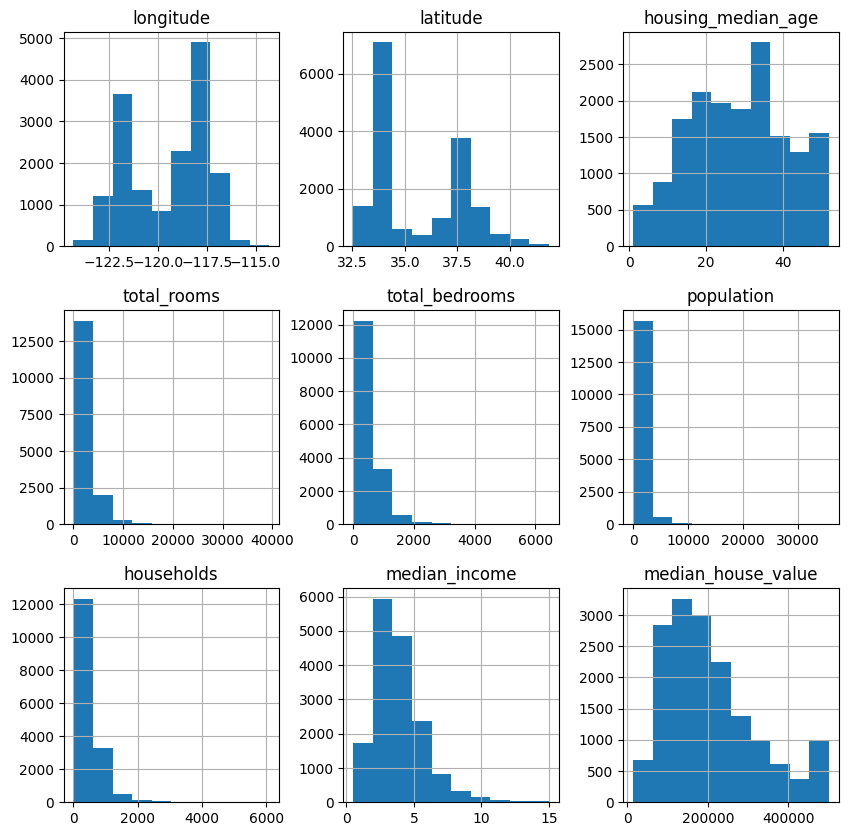

In [294]:
train_data.hist(figsize=(10,10))

In [295]:
train_data_corr = train_data.drop(['ocean_proximity'], axis=1 )

In [296]:
train_data_corr.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924178,-0.105350,0.037169,0.062565,0.096409,0.051085,-0.018294,-0.046124
latitude,-0.924178,1.000000,0.007322,-0.027597,-0.059448,-0.103379,-0.064320,-0.075423,-0.143572
housing_median_age,-0.105350,0.007322,1.000000,-0.361742,-0.321509,-0.295523,-0.304615,-0.120673,0.108523
total_rooms,0.037169,-0.027597,-0.361742,1.000000,0.929214,0.854457,0.919259,0.198925,0.131866
total_bedrooms,0.062565,-0.059448,-0.321509,0.929214,1.000000,0.877433,0.981458,-0.008996,0.048180
population,0.096409,-0.103379,-0.295523,0.854457,0.877433,1.000000,0.904823,0.003062,-0.027608
households,0.051085,-0.064320,-0.304615,0.919259,0.981458,0.904823,1.000000,0.011610,0.061787
median_income,-0.018294,-0.075423,-0.120673,0.198925,-0.008996,0.003062,0.011610,1.000000,0.685175
median_house_value,-0.046124,-0.143572,0.108523,0.131866,0.048180,-0.027608,0.061787,0.685175,1.000000


<Axes: >

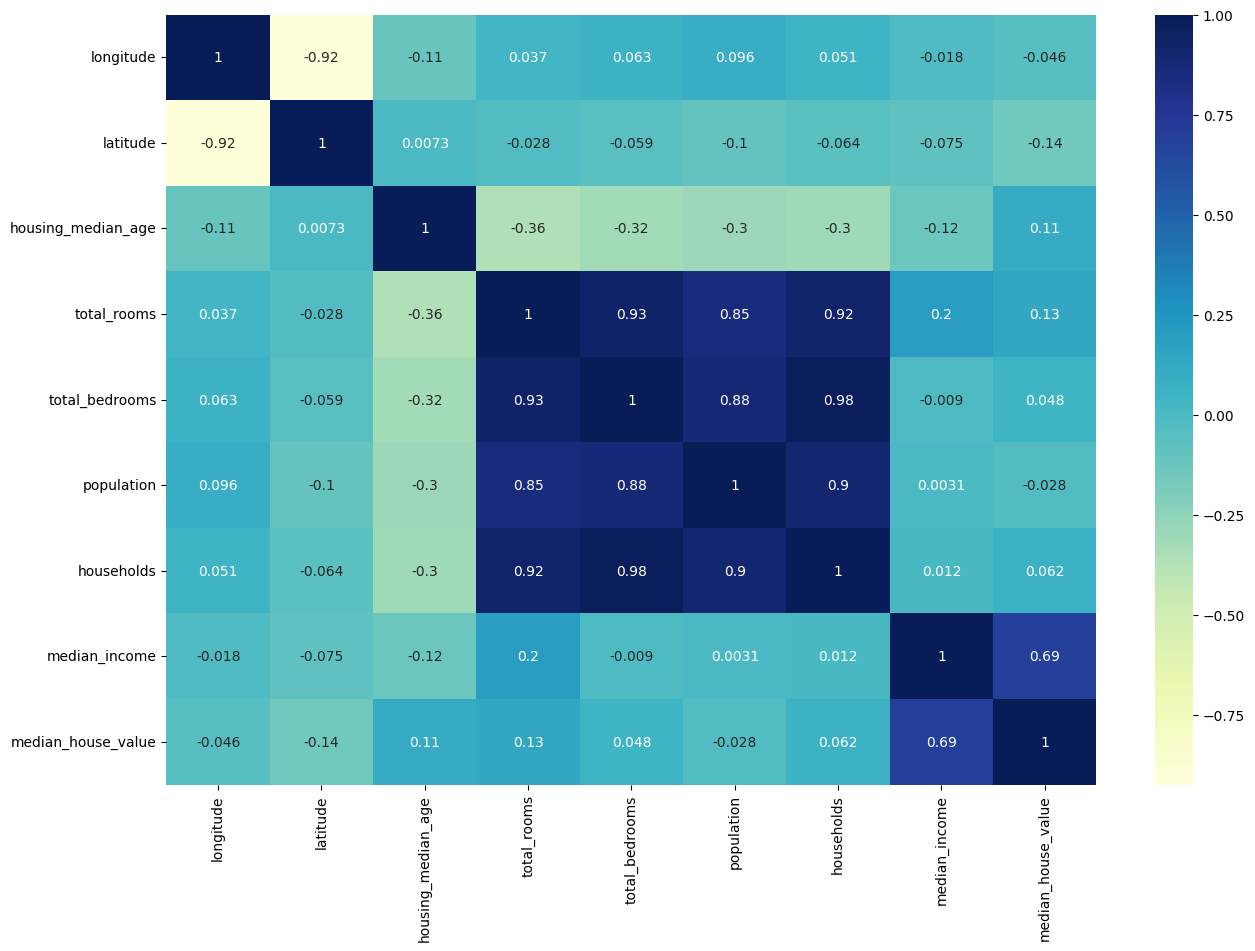

In [297]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(train_data_corr.corr(), annot=True, cmap="YlGnBu", ax=ax)

# Replacing 'ocean_proximity' String columns with numerical values 

In [298]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7245
INLAND        5155
NEAR OCEAN    2120
NEAR BAY      1823
ISLAND           3
Name: count, dtype: int64

In [299]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).replace({True: 1, False: 0})).drop(['ocean_proximity'], axis=1)

In [300]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11033,-117.81,33.79,23.0,3114.0,610.0,2045.0,577.0,3.7500,211900.0,1,0,0,0,0
7078,-117.99,33.94,30.0,2395.0,565.0,1214.0,521.0,3.7045,212300.0,1,0,0,0,0
4903,-118.25,34.01,30.0,962.0,291.0,1280.0,263.0,1.4464,110200.0,1,0,0,0,0
15045,-116.92,32.77,16.0,2770.0,406.0,1269.0,429.0,6.6783,275000.0,1,0,0,0,0
10541,-117.74,33.46,9.0,6564.0,1316.0,1720.0,904.0,4.8900,454100.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,-118.09,33.92,36.0,847.0,185.0,713.0,194.0,4.8542,167400.0,1,0,0,0,0
19450,-121.03,37.68,27.0,1956.0,327.0,1004.0,307.0,3.7857,110500.0,0,1,0,0,0
12372,-116.40,33.78,8.0,3059.0,500.0,612.0,208.0,6.8729,259200.0,0,1,0,0,0
2250,-119.80,36.80,43.0,1951.0,288.0,725.0,308.0,6.3359,169300.0,0,1,0,0,0


# Corelation heatmap 

<Axes: >

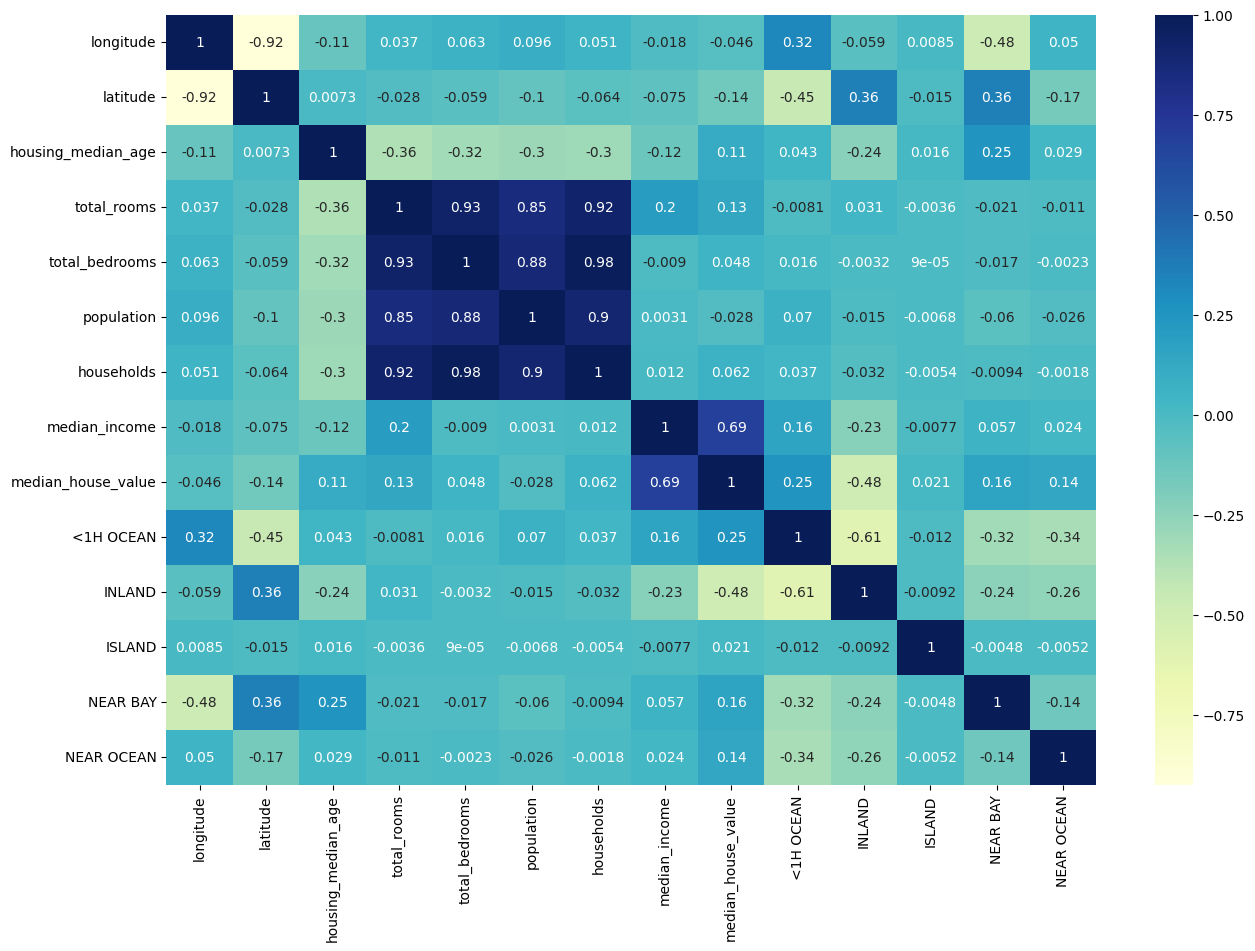

In [301]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu", ax=ax)

# log columns distribution

In [302]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

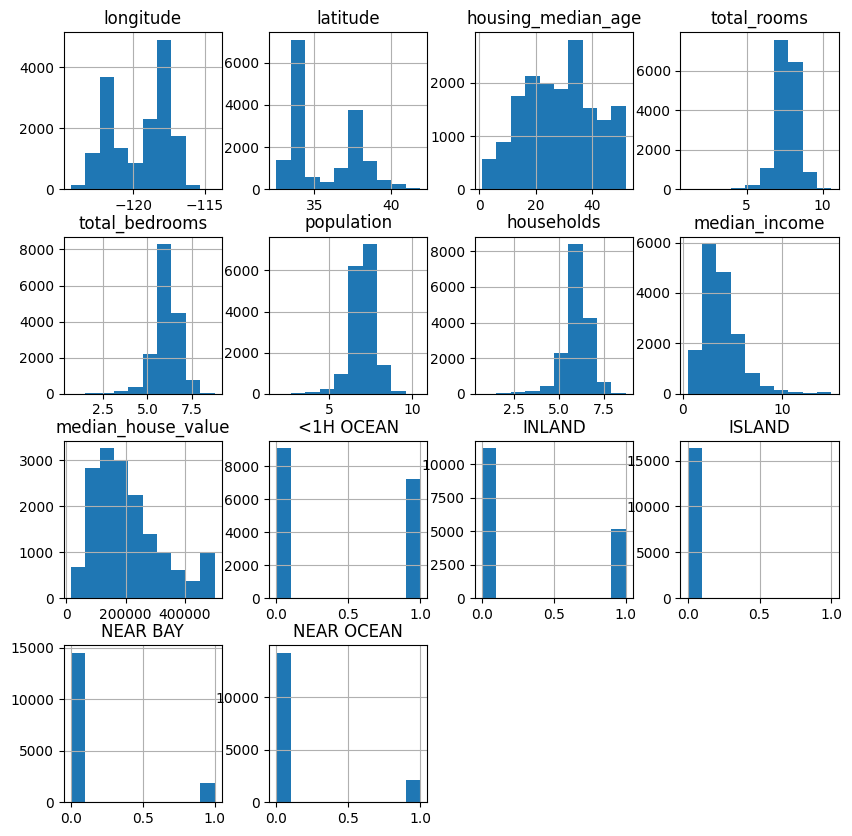

In [303]:
train_data.hist(figsize=(10,10))

# Plotting the data on a coordinate grid against the price.

<Axes: xlabel='latitude', ylabel='longitude'>

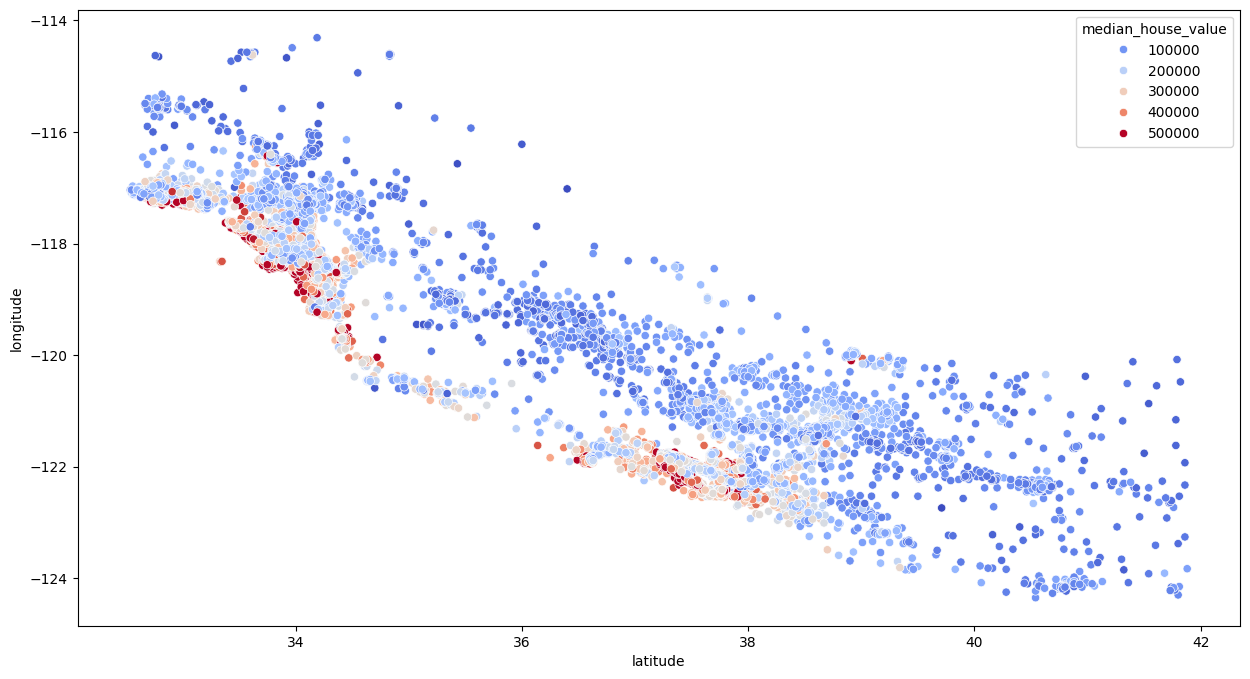

In [304]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

# Trying to create some additionals features, that have more corelations to the target value. In this case: Bedroom ratio and rooms in haushold

In [305]:
train_data['bedroom_percentage'] = train_data['total_bedrooms']/train_data['total_rooms']#
train_data['houshold_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

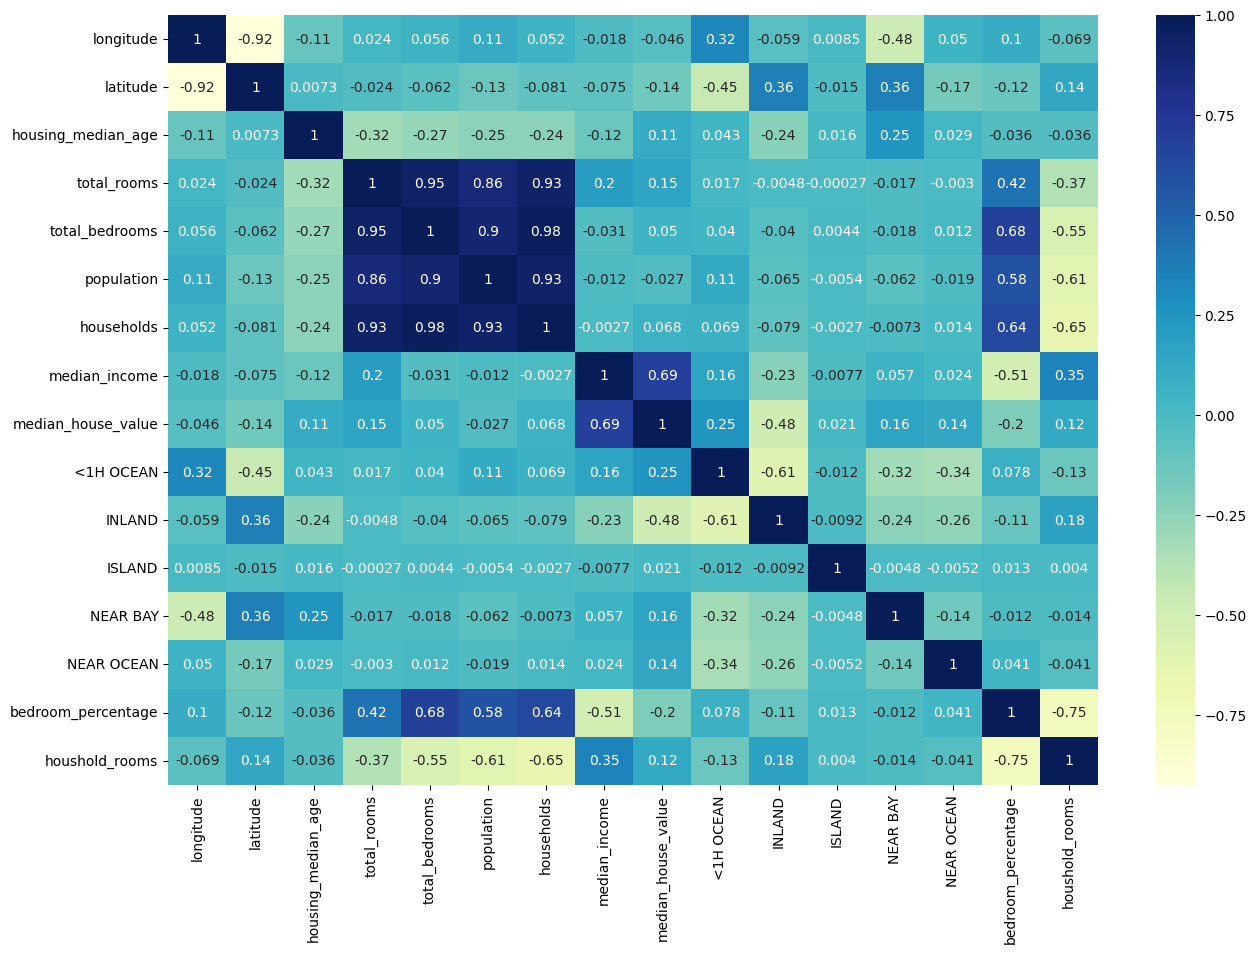

In [306]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu", ax=ax)

# Linear regression model

In [307]:
X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [308]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity).replace({True: 1, False: 0})).drop(['ocean_proximity'], axis=1)

test_data['bedroom_percentage'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['houshold_rooms'] = test_data['total_rooms']/test_data['households']



In [309]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [310]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_percentage,houshold_rooms
4249,-118.34,34.11,40.0,8.609955,7.125283,7.618251,7.033506,3.6974,500001.0,1,0,0,0,0,0.827563,1.224134
5208,-118.29,33.93,41.0,6.799056,5.293305,6.406880,5.129899,2.2778,128100.0,1,0,0,0,0,0.778535,1.325378
7701,-118.13,33.97,36.0,7.473069,5.690359,6.731018,5.590987,4.6992,251900.0,1,0,0,0,0,0.761449,1.336628
7046,-118.04,33.95,36.0,7.589336,5.910797,7.120444,5.874931,4.6150,174000.0,1,0,0,0,0,0.778829,1.291817
17404,-120.44,34.94,29.0,7.537963,6.248043,7.399398,6.200509,1.6875,122700.0,1,0,0,0,0,0.828877,1.215701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,-118.36,33.87,17.0,6.987490,5.676754,6.395262,5.641907,3.9868,281900.0,1,0,0,0,0,0.812417,1.238498
2737,-115.56,32.78,46.0,7.828835,6.196444,7.367709,6.152733,3.0603,70800.0,0,1,0,0,0,0.791490,1.272416
15847,-122.44,37.75,21.0,8.604838,7.129298,7.742836,7.074117,4.5469,409700.0,0,0,0,1,0,0.828522,1.216383
11308,-117.93,33.77,36.0,8.057694,6.368187,7.519150,6.331502,4.5833,190700.0,1,0,0,0,0,0.790324,1.272636


In [311]:
reg.score(X_test, Y_test)

0.6832695157633478

# The same linear regression model, but with scailing of data.

In [317]:
X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_scale, Y_train)

LinearRegression()

In [318]:
X_test_scale = scaler.transform(X_test)

In [319]:
reg.score(X_test_scale, Y_test)

0.6832318597175466